#### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

# Exercises

## 1. Clustering with the Iris Dataset. Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
new_col_name = []

for col in df.columns:
    new_col_name.append(col.lower().replace('.', '_'))

df.columns = new_col_name

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


#### A. Choose features other than the ones used in the lesson.

In [4]:
X = df[['sepal_width', 'petal_width']]

In [5]:
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [9]:
df['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

/var/folders/5l/kpcqc8ws4q1c6n6rsks4xbbw0000gn/T/ipykernel_96006/1748598858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [10]:
X.head()

,sepal_width,petal_width,cluster
1,3.5,0.2,1
2,3.0,0.2,1
3,3.2,0.2,1
4,3.1,0.2,1
5,3.6,0.2,1


#### B. Visualize the results of your clustering.

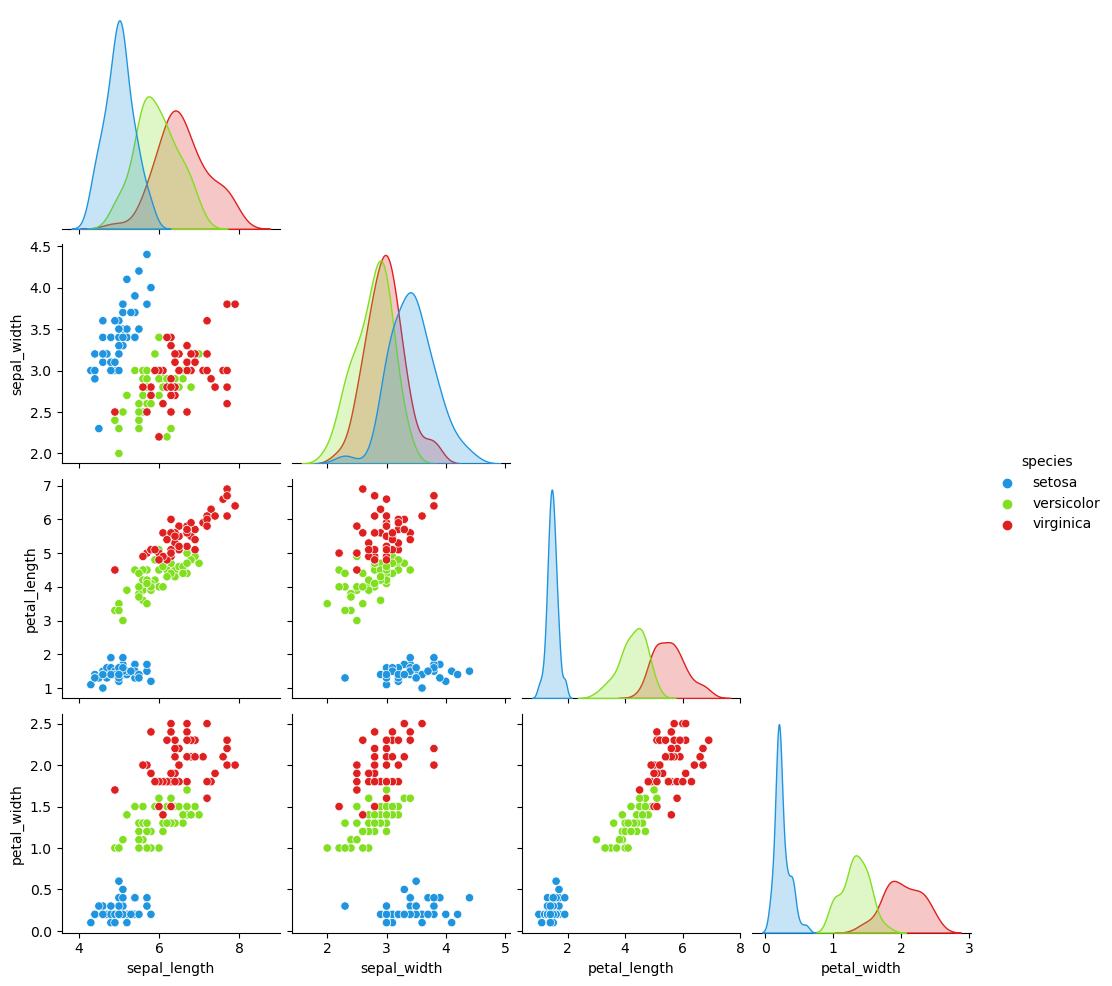

In [92]:
sns.pairplot(data=df, hue='species', corner=True)
plt.show()

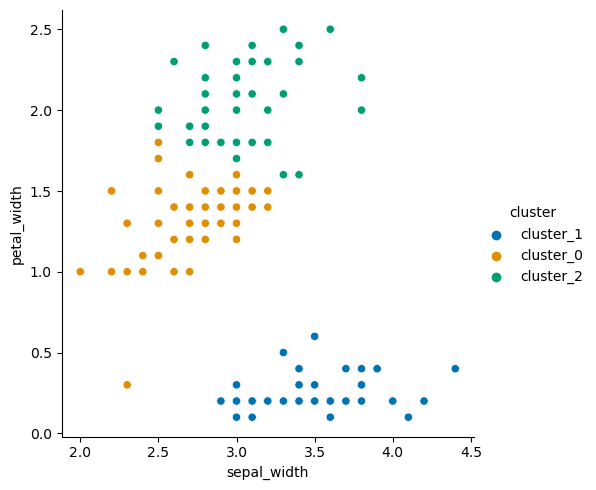

In [93]:
sns.relplot(x='sepal_width', y='petal_width', hue='cluster', palette='colorblind', data=df)
plt.show()

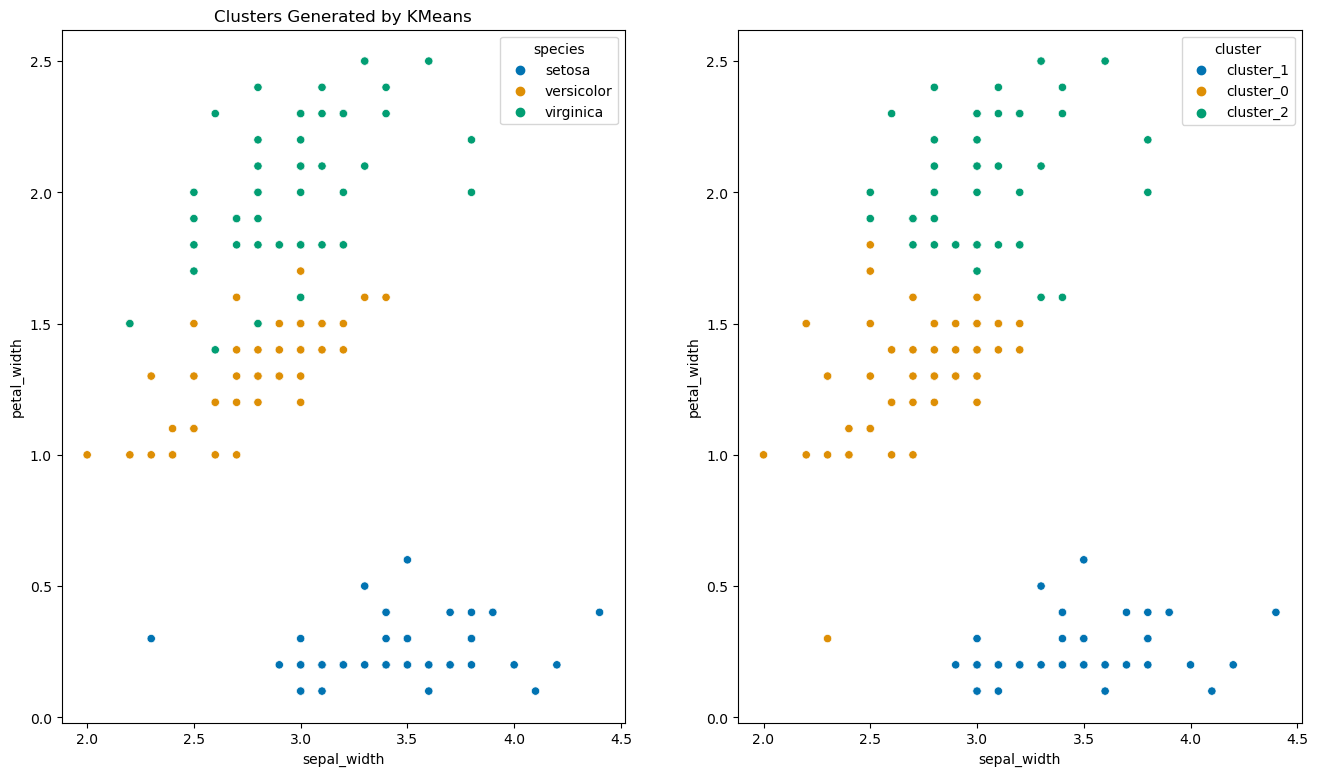

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))

sns.scatterplot(ax=axes[0], x='sepal_width', y='petal_width', hue='species', palette='colorblind', data=df)
axes[0].set_title('Actual Distribution of Species')

sns.scatterplot(ax=axes[1], x='sepal_width', y='petal_width', hue='cluster', palette='colorblind', data=df)
axes[0].set_title('Clusters Generated by KMeans')

plt.show()

In [11]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.98
versicolor,5.936,2.770,4.260,1.326,0.16
virginica,6.588,2.974,5.552,2.026,1.76


In [12]:
def make_blob():
    X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.7, random_state=0)
    plt.figure(figsize = (10,6))
    plt.scatter(X[:, 0], X[:, 1], s=30, color = 'gray')
    return plt.show()

In [15]:
def viz_iris(iris):
    """
    This function will plot scatter chart for Actual species and those predicted by K - Means
    """
    
    # Get centroids' coordinates
    centroids = np.array(iris.groupby('cluster')['petal_width', 'sepal_width'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]

    # Add centroids' coordinates into new columns in local df
    iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    # Creates new column in local df to map distinct cluster colors
    colors = ['#81DF20' ,'#2095DF','#DF2020']
    iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

    #specify custom palette for sns scatterplot
    colors1 = ['#2095DF','#81DF20' ,'#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    # Plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = iris, x = 'petal_width', y = 'sepal_width', ax = ax1, hue = 'species', palette=customPalette)
    plt.title('Actual Species')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(iris.petal_width, iris.sepal_width, c=iris.c, alpha = 0.6, s=10)
    ax2.set(xlabel = 'petal_width', ylabel = 'sepal_width', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
    iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
    plt.tight_layout()
    plt.show()

/var/folders/5l/kpcqc8ws4q1c6n6rsks4xbbw0000gn/T/ipykernel_96006/1914397871.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  centroids = np.array(iris.groupby('cluster')['petal_width', 'sepal_width'].mean())


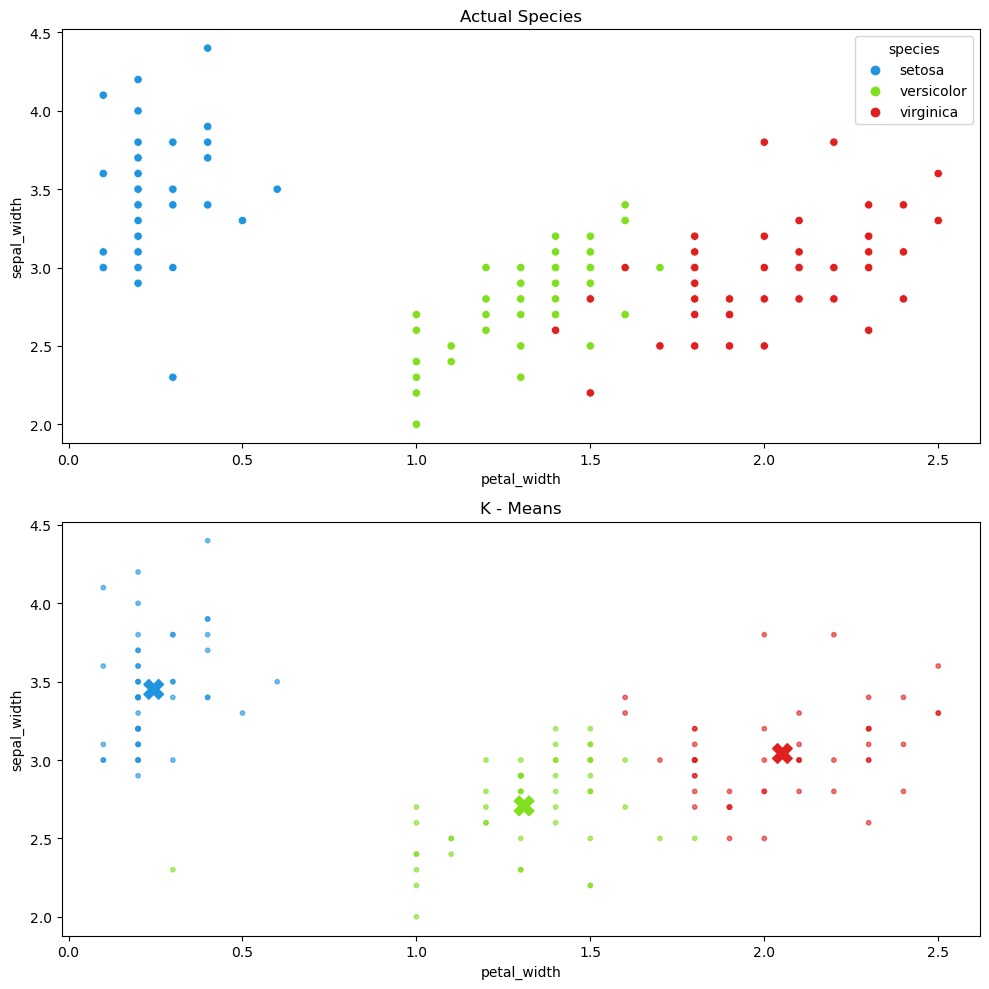

In [16]:
viz_iris(df)

#### Cluster Centers

In [17]:
kmeans.cluster_centers_

array([[2.70754717, 1.30943396],
       [3.45102041, 0.24489796],
       [3.04166667, 2.05208333]])

In [19]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns[:2])
centroids

,sepal_width,petal_width
0,2.707547,1.309434
1,3.451020,0.244898
2,3.041667,2.052083


In [22]:
df.groupby('cluster')['sepal_width','petal_width'].mean()

/var/folders/5l/kpcqc8ws4q1c6n6rsks4xbbw0000gn/T/ipykernel_96006/982659213.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster')['sepal_width','petal_width'].mean()


,sepal_width,petal_width
cluster,,
0,2.707547,1.309434
1,3.451020,0.244898
2,3.041667,2.052083


In [23]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


<Figure size 1400x900 with 0 Axes>

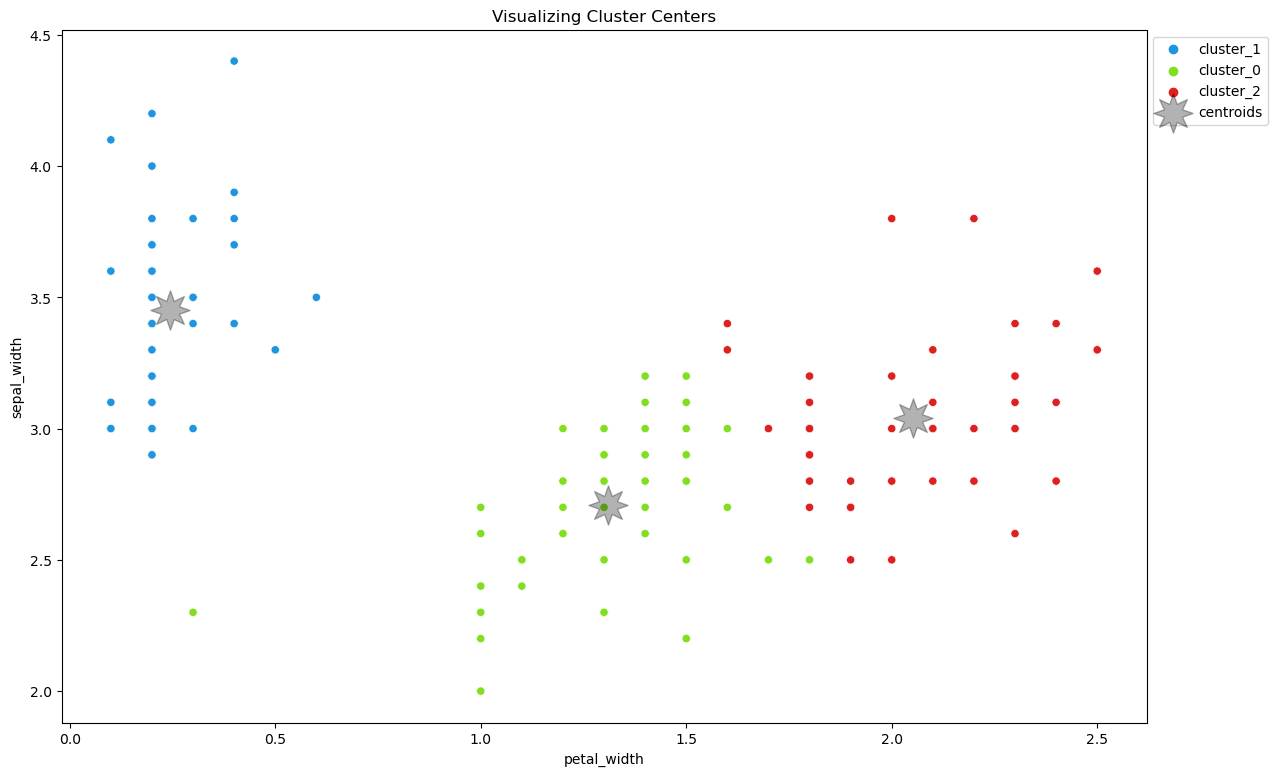

In [24]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = df, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = df['cluster'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

#### C. Use the elbow method to visually select a good value for k.

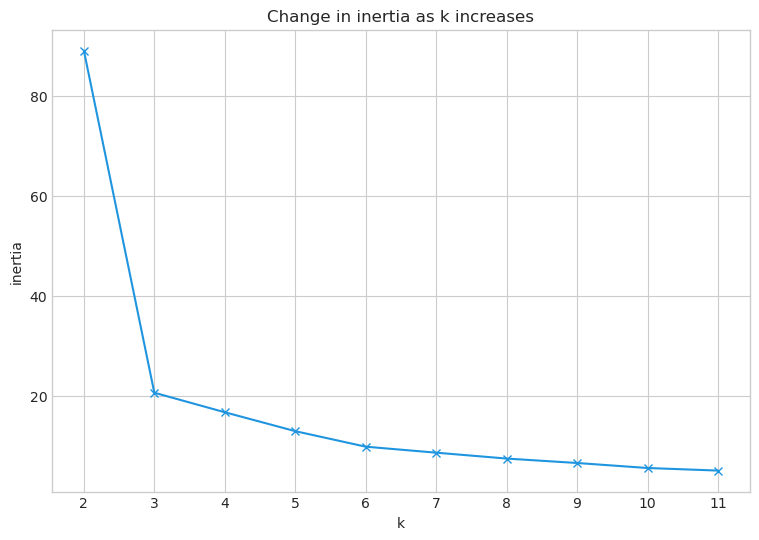

In [25]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

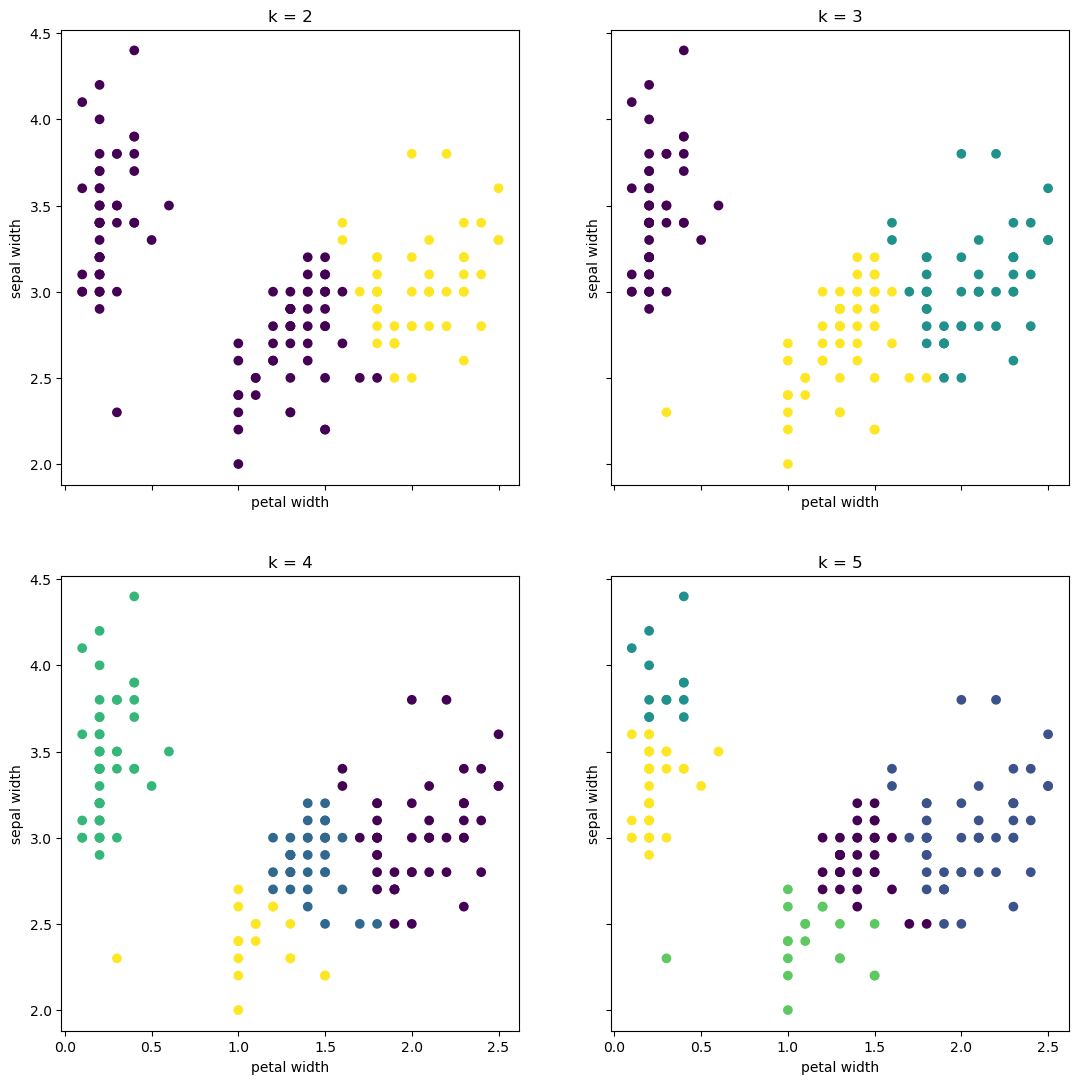

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_width, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='sepal width')


#### D. Repeat the clustering, this time with 3 different features.

In [29]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


petal length / width  
sepal length

In [30]:
X2 = df[['petal_length', 'petal_width', 'sepal_length']]
X2.head()

,petal_length,petal_width,sepal_length
1,1.4,0.2,5.1
2,1.4,0.2,4.9
3,1.3,0.2,4.7
4,1.5,0.2,4.6
5,1.4,0.2,5.0


In [31]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X2)

# USE (predict using) the thing 
kmeans.predict(X2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [32]:
# make a new column names cluster in iris and X dataframe
df['cluster2'] = kmeans.predict(X2)

X2['cluster'] = kmeans.predict(X2)

df.head(3)

/var/folders/5l/kpcqc8ws4q1c6n6rsks4xbbw0000gn/T/ipykernel_96006/2520836315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['cluster'] = kmeans.predict(X2)


,sepal_length,sepal_width,petal_length,petal_width,species,cluster,cluster2
1,5.1,3.5,1.4,0.2,setosa,cluster_1,0
2,4.9,3.0,1.4,0.2,setosa,cluster_1,0
3,4.7,3.2,1.3,0.2,setosa,cluster_1,0


In [33]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster2
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.00
versicolor,5.936,2.770,4.260,1.326,1.04
virginica,6.588,2.974,5.552,2.026,1.72


In [34]:
kmeans.cluster_centers_

array([[1.462     , 0.246     , 5.006     ],
       [4.39354839, 1.43387097, 5.9016129 ],
       [5.74210526, 2.07105263, 6.85      ]])

In [37]:
# Make a dataframe 
centroids2 = pd.DataFrame(kmeans.cluster_centers_, columns = X2.columns[:3])
centroids2


,petal_length,petal_width,sepal_length
0,1.462000,0.246000,5.006000
1,4.393548,1.433871,5.901613
2,5.742105,2.071053,6.850000


In [40]:
df.groupby('cluster2')['petal_length', 'petal_width', 'sepal_length'].mean()

/var/folders/5l/kpcqc8ws4q1c6n6rsks4xbbw0000gn/T/ipykernel_96006/734099498.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster2')['petal_length', 'petal_width', 'sepal_length'].mean()


,petal_length,petal_width,sepal_length
cluster2,,,
0,1.462000,0.246000,5.006000
1,4.393548,1.433871,5.901613
2,5.742105,2.071053,6.850000


In [41]:
df['cluster2'] = 'cluster_' + df.cluster2.astype(str)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,cluster2
1,5.1,3.5,1.4,0.2,setosa,cluster_1,cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_1,cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_1,cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_1,cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_1,cluster_0


NameError: name 'cluster2' is not defined

<Figure size 1400x900 with 0 Axes>

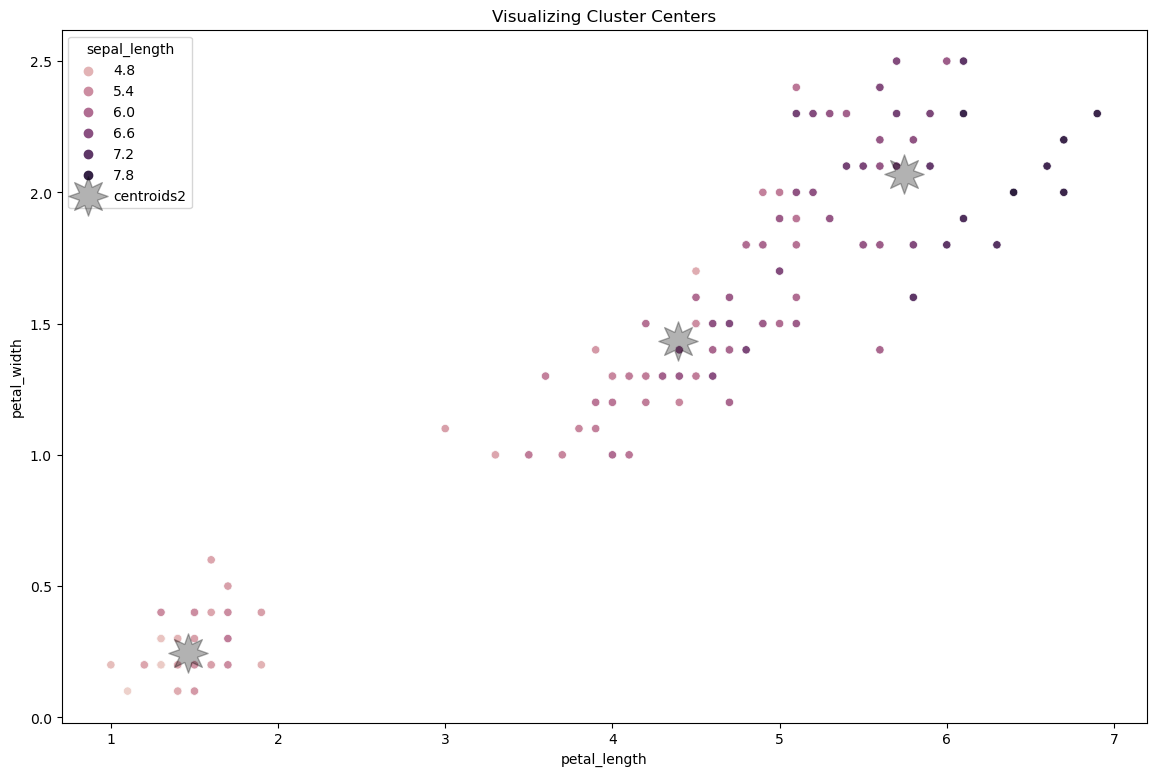

In [66]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = df, hue = 'sepal_length')


# plot cluster centers (centroids)
centroids2.plot.scatter(x = 'petal_length', y = 'petal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids2')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = df['cluster2'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster2}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1400x900 with 0 Axes>

<Figure size 1400x900 with 0 Axes>

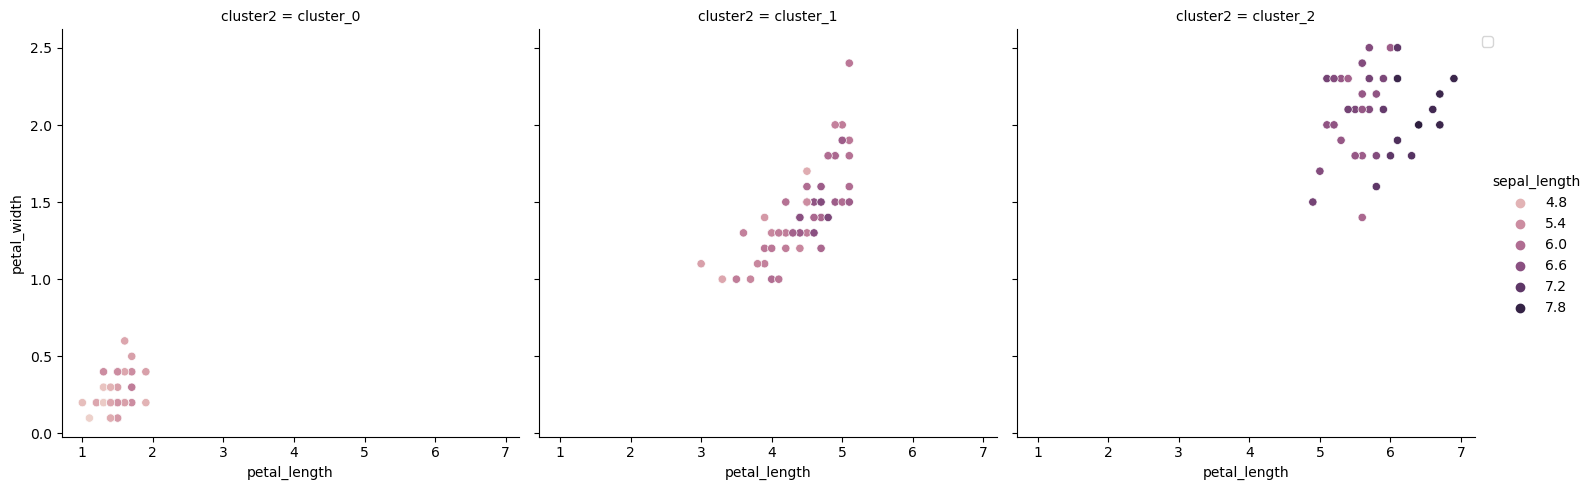

In [69]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.relplot(x = 'petal_length', y = 'petal_width', data = df, hue = 'sepal_length', col='cluster2')


# # plot cluster centers (centroids)
# centroids2.plot.scatter(x = 'petal_length', y = 'petal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids2')

# plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = df['cluster2'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {df.cluster2}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

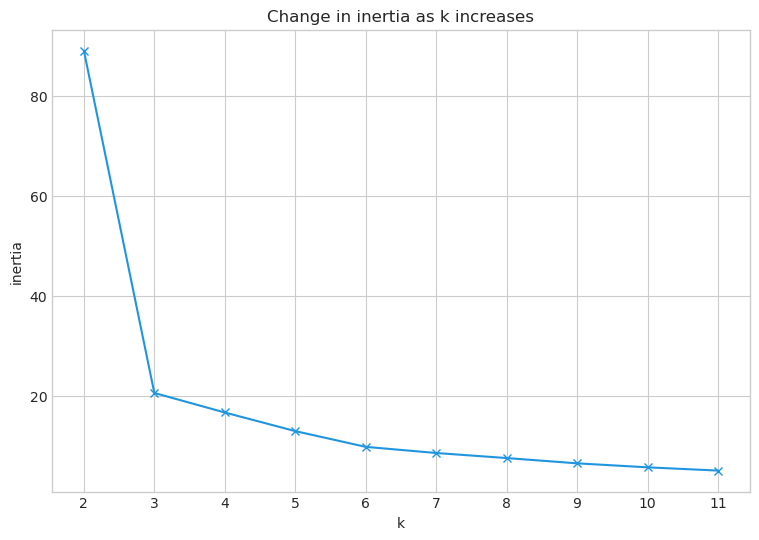

In [45]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

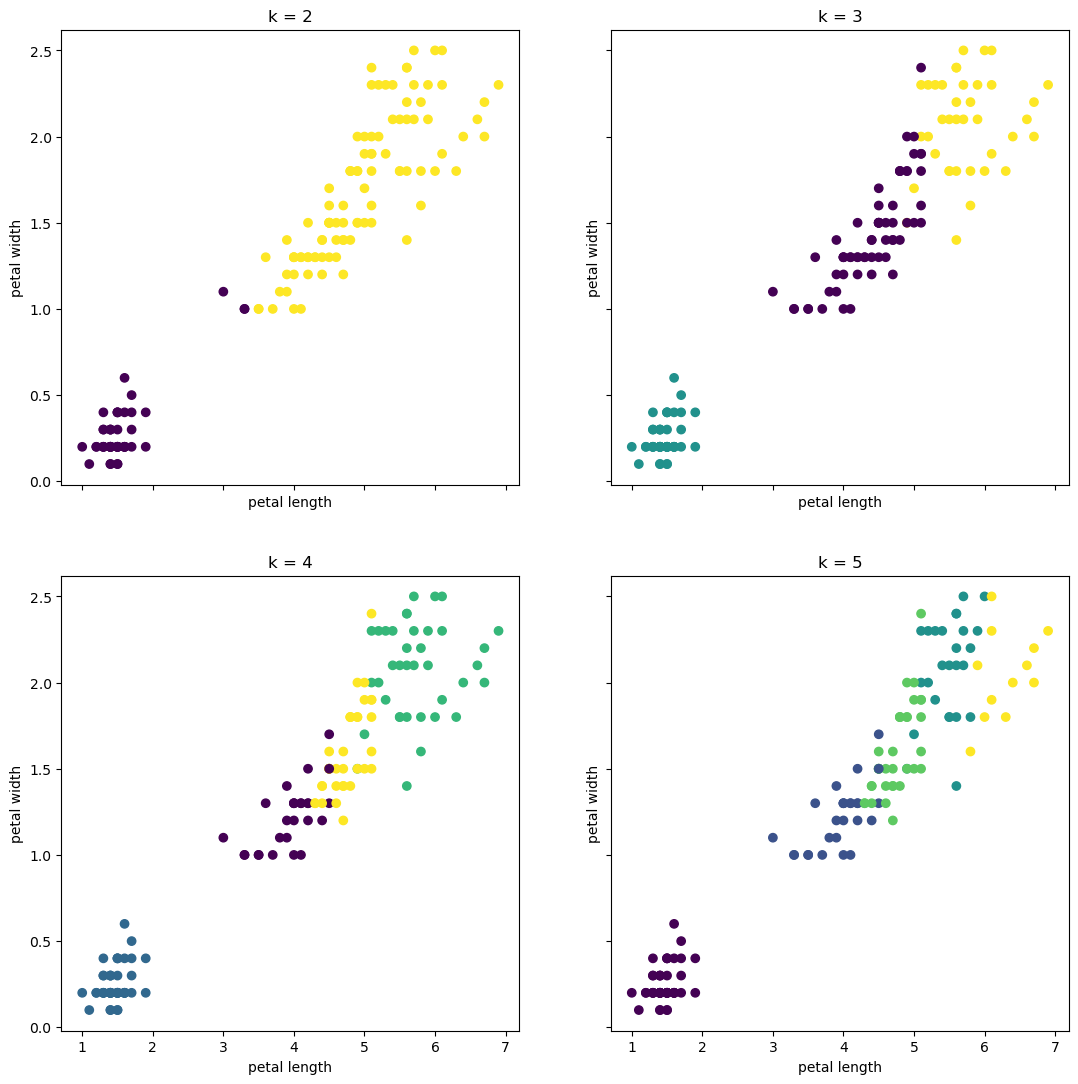

In [47]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X2).predict(X2)
    
    ax.scatter(X2.petal_length, X2.petal_width, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='petal length', ylabel='petal width')

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

#### Acquire

In [52]:
import os
from env import username, password, get_db_url

In [49]:
def new_mall_data():
    '''
    This function will:
    - create a connect_url to mySQL
    - return a df of the given query from the mall_customers db
    '''
    url = get_db_url('mall_customers')
    SQL_query = '''
        select *
        from customers;
        '''
    return pd.read_sql(SQL_query, url)

In [50]:
def get_mall_data(filename="mall.csv"):
    """
    This function will:
    - Check local directory for csv file
        - return if exists
    - If csv doesn't exists:
        - create a df of the SQL_query
        - write df to csv
    - Output zillow df
    """
    if os.path.exists(filename):
        df = pd.read_csv(filename, index_col=0) 
        print('Found and loading CSV!')
        return df
    
    else:
        df = new_mall_data()
        
        #want to save to csv
        df.to_csv(filename)
        print('Creating new CSV!')
        return df

In [53]:
mall = get_mall_data()

Creating new CSV!


In [54]:
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
mall.shape

(200, 5)

#### Prepare

In [60]:
#splits, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [56]:
def train_validate_test_split(df, target, seed=123):
    '''
    accepts dataframe and splits the data into train, validate and test 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, random_state=seed)
    
    train, validate = train_test_split(train_validate, test_size=0.25, random_state=seed)
    return train, validate, test

In [57]:
def scale_my_data(train, validate, test):
    '''
    scale my data using minmaxscaler and add it back to my input datasets
    '''
    scaler = MinMaxScaler()
    scaler.fit(train[['age', 'annual_income']])
    
    X_train_scaled = scaler.transform(train[['age', 'annual_income']])
    X_validate_scaled = scaler.transform(validate[['age', 'annual_income']])
    X_test_scaled = scaler.transform(test[['age', 'annual_income']])

    train[['age_scaled', 'annual_income_scaled']] = X_train_scaled
    validate[['age_scaled', 'annual_income_scaled']] = X_validate_scaled
    test[['age_scaled', 'annual_income_scaled']] = X_test_scaled
    return train, validate, test

In [58]:
def prep_mall(df):
    '''
    dummy var for gender into is_male
    split on target of 'spending_score'
    scale age and annual income. 
    '''
    df['is_male'] = pd.get_dummies(df['gender'], drop_first=True)['Male']
    train, validate, test = train_validate_test_split(df, target='spending_score', seed=1349)
    train, validate, test = scale_my_data(train, validate, test)
    
    print(f'df: {df.shape}')
    print()
    print(f'train: {train.shape}')
    print(f'validate: {validate.shape}')
    print(f'test: {test.shape}')
    return df, train, validate, test

In [61]:
#prep my data!
mall, train, validate, test = prep_mall(mall)

df: (200, 6)

train: (120, 8)
validate: (40, 8)
test: (40, 8)


In [62]:
train.head()

,customer_id,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled
157,158,Female,30,78,78,0,0.230769,0.516393
13,14,Female,24,20,77,0,0.115385,0.040984
115,116,Female,19,65,50,0,0.019231,0.409836
68,69,Male,19,48,59,1,0.019231,0.270492
166,167,Male,42,86,20,1,0.461538,0.581967


In [63]:
mall.head()

,customer_id,gender,age,annual_income,spending_score,is_male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [100]:
# define independent variables for k-means

X = train[['age', 'annual_income']]
X.head()

,age,annual_income
157,30,78
13,24,20
115,19,65
68,19,48
166,42,86


In [113]:
# MAKE the thing
kmeans = KMeans(n_clusters=4)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)

array([0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 3, 1, 2, 2, 3, 3,
       0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 3,
       2, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 3,
       0, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 0, 1, 2, 1, 0,
       2, 1, 3, 2, 1, 1, 0, 2, 1, 0, 0, 1, 3, 3, 3, 1, 2, 1, 1, 1, 3, 1,
       1, 2, 0, 0, 1, 0, 3, 1, 1, 2], dtype=int32)

In [114]:
# make a new column names cluster in iris and X dataframe
train['cluster'] = kmeans.predict(X)

# X['cluster'] = kmeans.predict(X)

train.head(3)

,customer_id,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,cluster
157,158,Female,30,78,78,0,0.230769,0.516393,0
13,14,Female,24,20,77,0,0.115385,0.040984,1
115,116,Female,19,65,50,0,0.019231,0.409836,0


In [117]:
train.groupby('spending_score').mean()

,customer_id,age,annual_income,is_male,age_scaled,annual_income_scaled,cluster
spending_score,,,,,,,
4,33.000000,53.000000,33.000000,1.000000,0.673077,0.147541,1.000000
5,107.000000,28.333333,59.666667,0.666667,0.198718,0.366120,0.333333
6,7.000000,35.000000,18.000000,0.000000,0.326923,0.024590,1.000000
7,137.000000,44.000000,73.000000,0.000000,0.500000,0.475410,0.000000
8,193.000000,33.000000,113.000000,1.000000,0.288462,0.803279,3.000000
9,131.000000,47.000000,71.000000,1.000000,0.557692,0.459016,0.000000
13,173.000000,46.000000,87.500000,0.500000,0.538462,0.594262,0.000000
14,30.000000,51.500000,30.500000,0.000000,0.644231,0.127049,1.000000
15,124.333333,54.000000,68.666667,0.666667,0.692308,0.439891,1.333333


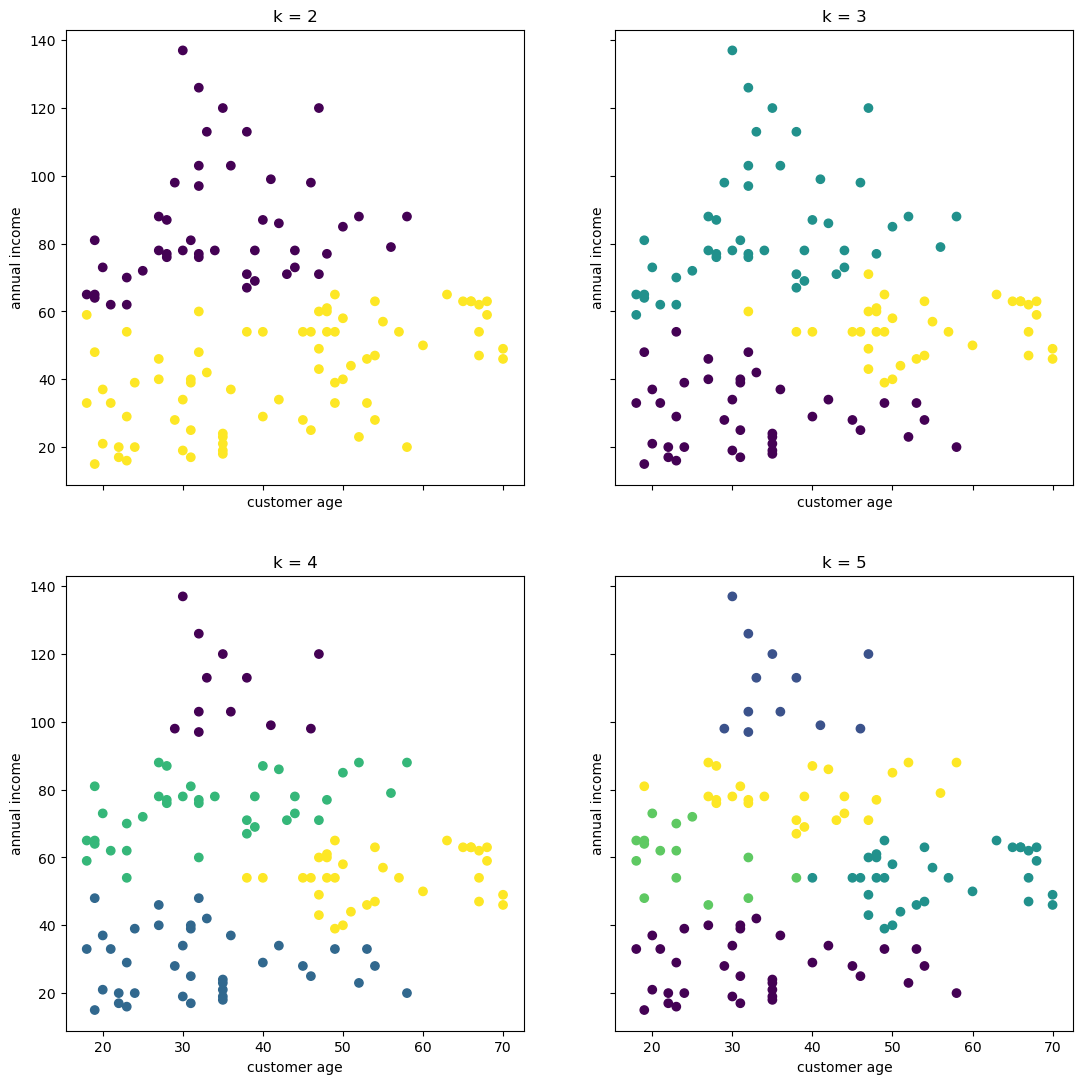

In [103]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.age, X.annual_income, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='customer age', ylabel='annual income')

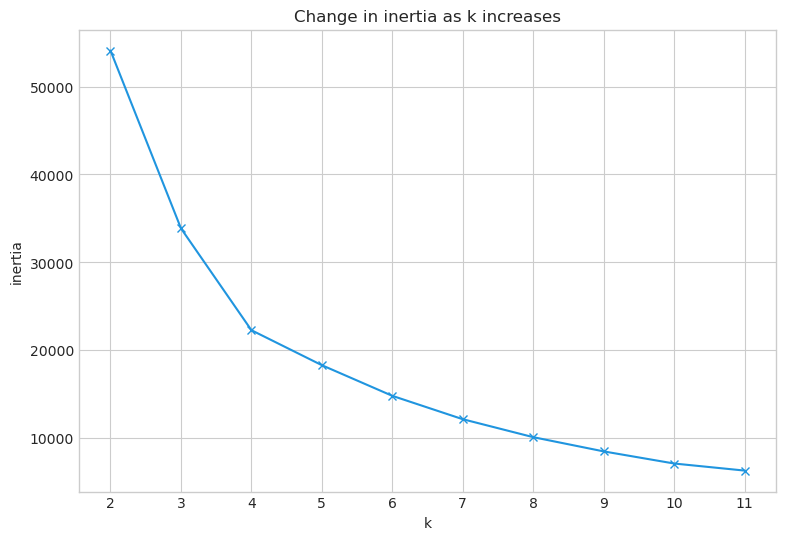

In [104]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

## 3. How does scaling impact the results of clustering?

#### Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [107]:
train.head()

,customer_id,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,cluster
157,158,Female,30,78,78,0,0.230769,0.516393,0
13,14,Female,24,20,77,0,0.115385,0.040984,1
115,116,Female,19,65,50,0,0.019231,0.409836,3
68,69,Male,19,48,59,1,0.019231,0.270492,3
166,167,Male,42,86,20,1,0.461538,0.581967,0


In [108]:
X_scaled = train[['age_scaled', 'annual_income_scaled']]

In [109]:
kmeans_scaled = KMeans(5)

kmeans_scaled.fit(X_scaled)

kmeans_scaled.predict(X_scaled)

array([1, 3, 1, 1, 2, 0, 3, 3, 0, 3, 3, 3, 0, 4, 1, 0, 2, 3, 4, 0, 2, 2,
       1, 3, 4, 4, 0, 0, 1, 0, 0, 1, 4, 2, 0, 2, 1, 1, 4, 4, 1, 0, 2, 2,
       0, 0, 4, 2, 0, 1, 0, 4, 0, 2, 1, 0, 2, 2, 1, 3, 1, 1, 4, 1, 2, 2,
       2, 3, 3, 2, 1, 3, 2, 3, 4, 4, 3, 3, 3, 3, 4, 0, 2, 1, 3, 0, 3, 1,
       4, 3, 2, 0, 0, 0, 1, 0, 3, 1, 1, 3, 2, 2, 2, 3, 0, 0, 3, 3, 2, 3,
       3, 0, 0, 2, 3, 4, 2, 0, 0, 0], dtype=int32)

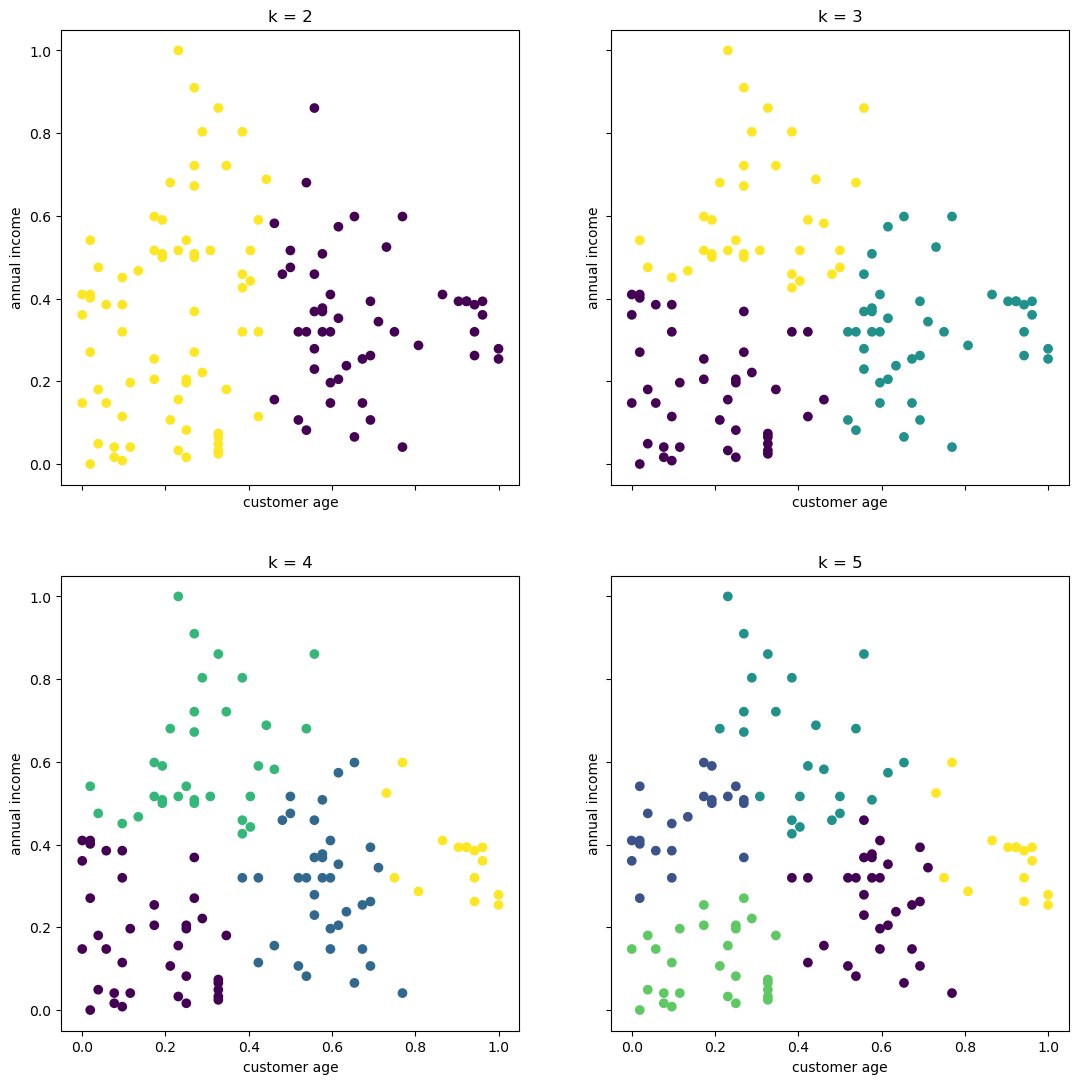

In [110]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    
    ax.scatter(X_scaled.age_scaled, X_scaled.annual_income_scaled, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='customer age', ylabel='annual income')

Bonus
1. Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
1. Visualize the data and guess the number and shape of the clusters.
1. Implement the KMeans algorithm on unscaled data and visualize the clusters.
1. Repeat the step above but with scaled data. 
1. Write down the takeaways from this exercise.